## Dataset Analysis

In this notebook we explore the data enough to have a basic understanding of it.

In [3]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint


In [35]:
def get_file_counts(path="."):
    """
    Function to count the number of files in folders in a directory

    :param path: the path of the directory where the file is to be searched
    :return file_count_dict: a dictionary containing the number of files in each folder
    in a directory
    """
    file_count_dict = {}

    total_file_count = 0  # total files

    for dirpath, dirnames, filenames in os.walk(path):
        file_count, folder_count = len(filenames), len(dirnames)

        total_file_count += file_count
        # print ("Files in ", dirpath, file_count)
        file_count_dict[dirpath.split('/')[-1]] = file_count

    print ("Total Files in " + path + ": ", total_file_count)
    return file_count_dict

## Dog Images

In [36]:
dog_train_dict = get_file_counts(path="./dogImages/train")
dog_test_dict = get_file_counts(path="./dogImages/test")
dog_valid_dict = get_file_counts(path="./dogImages/valid")

Total Files in ./dogImages/train:  6680
Total Files in ./dogImages/test:  836
Total Files in ./dogImages/valid:  835


The above shows a 80%:10%:10% split between the train, test and valid sets. Now let us plot the counts of 50 classes in the training set.

In [31]:
# pprint(dog_train_dict)
df_dog_train = pd.DataFrame.from_dict({'filename': list(dog_train_dict.keys()), 
                                      'count': list(dog_train_dict.values())})
df_dog_train = df_dog_train[1:] # remove the column called train
df_dog_train.head(133)

,filename,count
1,018.Beauceron,50
2,054.Collie,57
3,006.American_eskimo_dog,64
4,130.Welsh_springer_spaniel,44
5,035.Boykin_spaniel,53
...,...,...
129,001.Affenpinscher,64
130,050.Chinese_shar-pei,50
131,115.Papillon,63
132,080.Greater_swiss_mountain_dog,46


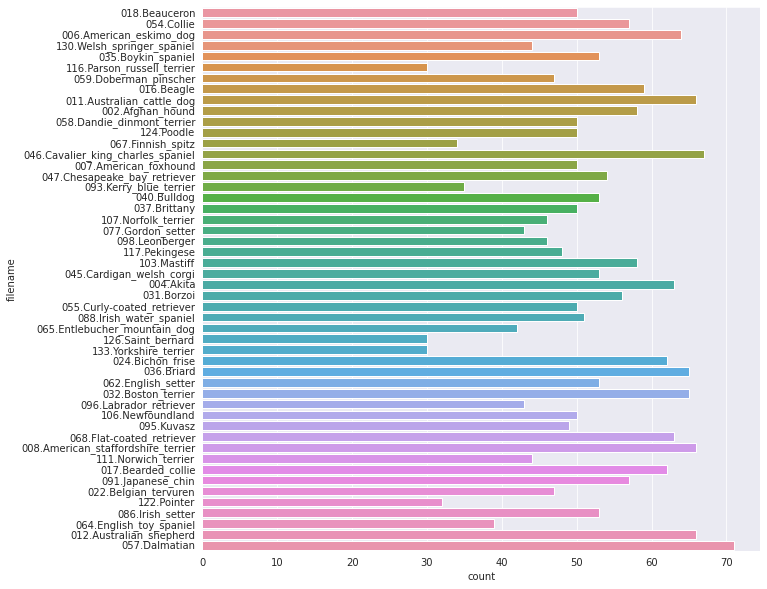

In [34]:
sns.set_style('darkgrid')

plt.figure(figsize=(10, 10))

ax = sns.barplot(x="count", y="filename", data=df_dog_train[:50])
plt.savefig("dogs_train.png", bbox_inches='tight')

The above plot shows an imbalance in the number of images for different dog breeds in the training set. The following plot will make this clearer:

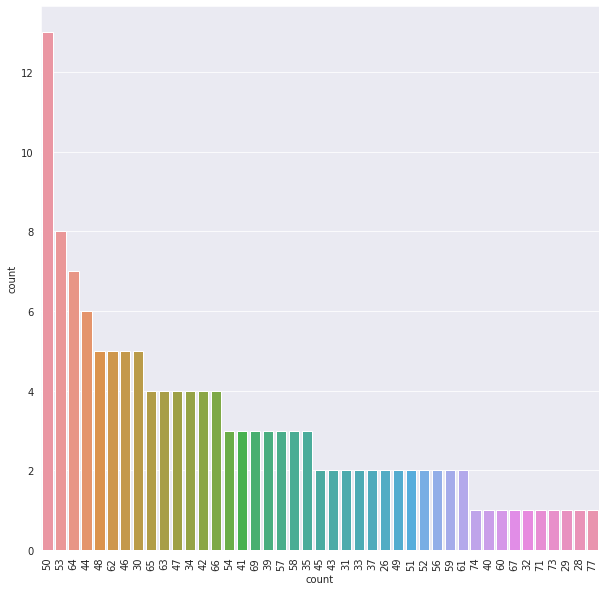

In [43]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
sns.countplot(x = df_dog_train['count'], order = df_dog_train['count'].value_counts().index)

The above plot suggests that most most of the classes have 50 images in the training set. Let's find the average, maximum and minimum images in the training set for each class.

In [32]:
df_dog_train.describe()

,count
count,133.000000
mean,50.225564
std,11.863885
min,26.000000
25%,42.000000
50%,50.000000
75%,61.000000
max,77.000000


There are an average of 50 images in each class in the training set, with the maximum being 77 and minimum being 26.

## Human Images

In [44]:
human_dict = get_file_counts(path="./lfw")

Total Files in ./lfw:  13234


Let's do the same for humans images too!

In [48]:
df_human = pd.DataFrame.from_dict({'filename': list(human_dict.keys()), 
                                      'count': list(human_dict.values())})
df_human = df_human[1:] # remove the column called lfw
df_human.head()

,filename,count
1,Geoffrey_Rush,1
2,Sebastien_Grosjean,4
3,James_Harris,1
4,William_Hochul,2
5,Eliane_Karp,4


In [49]:
df_human.describe()

,count
count,5749.000000
mean,2.301792
std,9.016410
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,530.000000


The maximum value shown in the above cell is 530. Let's investigate this.

In [50]:
print(list(human_dict.keys())[list(human_dict.values()).index(530)]) 

George_W_Bush


There are a 530 images of George W Bush. Let's see the histogram of counts to see if this is an outlier.

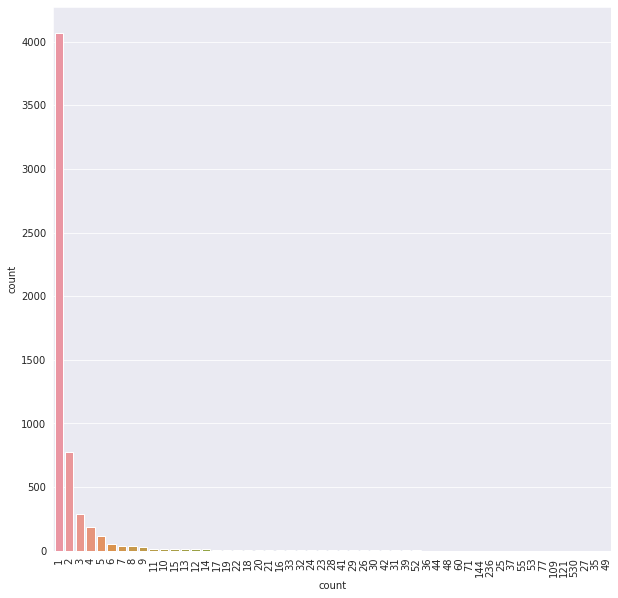

In [62]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
plt.xlabel('Number of people')
plt.ylabel('Number of images')
sns.countplot(x = df_human['count'], order = df_human['count'].value_counts().index)

In [74]:
df_human.groupby('count').size()

count
1      4069
2       779
3       291
4       187
5       112
6        55
7        39
8        33
9        26
10       15
11       16
12       10
13       11
14       10
15       11
16        3
17        8
18        5
19        7
20        5
21        4
22        5
23        3
24        3
25        1
26        2
27        1
28        2
29        2
30        2
31        2
32        3
33        3
35        1
36        1
37        1
39        2
41        2
42        2
44        1
48        1
49        1
52        2
53        1
55        1
60        1
71        1
77        1
109       1
121       1
144       1
236       1
530       1
dtype: int64

From the above plot we see that the dataset is highly imbalanced, with the majority of people having 1 to 9 images. Let's get rid of this majority so that we can better view the rest of the dataset.

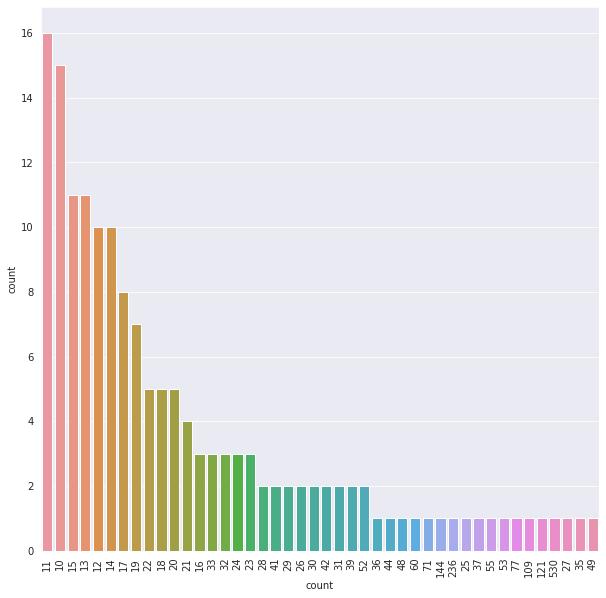

In [63]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
sns.countplot(x = df_human['count'], order = df_human['count'].value_counts().index[9:])

Clearly, we have a lot of images some specific people.